# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

### Sarah Alqaysi

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [145]:
import regex
import nltk

In [147]:
# Add any additional import statements you need here
#%run "$BASE_DIR/settings.py"

%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'png'

In [148]:
# change `data_location` to the location of the folder on your machine.
#data_location = "/users/chandler/dropbox/teaching/repos/ads-tm-api-scrape/"

data_location = "/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week two/M1 Assignment Data/M1 Results/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [149]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = 13
    num_unique_tokens = 9
    lexical_diversity = 0.69
    num_characters = 55
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [150]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(descriptive_stats(text, verbose=False)[3] == 55)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)

There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.690 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: <!-- Your answer here --> 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [167]:
# Read in the lyrics data

# Cher lyrics

with open("C:/Users/z003cu8m/Desktop/cher_angelsrunning.txt") as f:
    cher_lyrics = f.read()
    print(cher_lyrics)

"Angels Running"



Well I heard enough 
And I've seen enough
And I know anough to know 
I know a good thing when I see it
And it's a bad thing to let go

Weel I've been around 
I've been up and down 
Until I bailed out of control 
With your world all in motion
Gonna put a ball
And chain on your soul 

All those angels running 
Picking up the pieces 
Putting hearts togheter 
Broke long ago 
I know a good thing when I see it 
And it's a bad thing to let go 

We'll always be lovers 
With borders of there own 
And you may charge across 
In a golden chariot 
But you will never be at home 

'Cause I had dreams 
Like distant thunder
I had hope like a prayer unheard 
This nothing less than perfect
In a less than perfect world 

All those angles running 
Picking up the pieces 
Putting back togheter 
Hearts broke long ago 
I know a good thing when I see it 
And it's a bad thing to let go 
It's a bad thing to let go 
It's a bad thing.



In [168]:
# Robyn lyrics

with open("C:/Users/z003cu8m/Desktop/robyn_anytimeyoulike.txt") as f:
    robyn_lyrics = f.read()
    print(robyn_lyrics)

"Anytime You Like"



It's like you're waiting for me to start
There's no right moment to break my heart
Boy you can tell me any time you like

We could talk any day of the week
I cry myself to sleep in my pink silk sheets
Boy you can tell me any time you like
Boy you can tell me any time you like

Under pressure, alright
Under pressure, you and I
Under pressure, love is uptight
Under pressure, yeah

I keep quiet and hope you forget
You know that kitchen table, let's buy it
Boy you can tell me anytime you like, anytime

If I was brave I wouldn't keep my mouth shut
But I'm selfish, I don't wanna give you up
Boy you can tell me anytime you like
Boy you can tell me anytime you like

Under pressure, alright
Under pressure, you and I
Under pressure, love is uptight
Under pressure, yeah
Under pressure, yeah
Under pressure, alright
Under pressure, you and I
Under pressure, this love is uptight
Under pressure, yeah

Hey baby
(How ya doin'?)
How was your day?
What ya doin'?
(I said I love you)


In [83]:
# Read in the twitter data

twitter_data_cher = pd.read_csv(r"C:/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week two/M1 Assignment Data/M1 Results/twitter/sample_cher_data_followers.txt")
twitter_data_cher

,description\t\t\t\t\t
0,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜\t\t\t...
1,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡\t\t\...
2,csu\t\t\t\t\t
3,Writer @Washinformer @SpelmanCollege alumna #D...
4,I’m unemployed and live with my parents. MOOPS...
5,zoowee mama\t\t\t\t\t
6,Let the healing begin. Let us learn from the p...
7,do what thou wilt. 🖤✨\t\t\t\t\t
8,Curious Canadian Contemplator. She/Her. Sexage...
9,(She/Her/Hers) Feminist. LGBTQ+. BLM. Mental h...


#### Convert into a list

In [151]:
twitter_data_cher_list = twitter_data_cher.values.tolist()
print(twitter_data_cher_list)

[['𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜\t\t\t\t\t'], ['163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡\t\t\t\t\t'], ['csu\t\t\t\t\t'], ['Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com\t\t\t\t\t'], ['I’m unemployed and live with my parents. MOOPS!\t\t\t\t\t'], ['zoowee mama\t\t\t\t\t'], ['Let the healing begin. Let us learn from the past. 🇨🇦 follower of #TheResistance\t\t\t\t\t'], ['do what thou wilt. 🖤✨\t\t\t\t\t'], ['Curious Canadian Contemplator. She/Her. Sexagenarian. We are here for each other!\t\t\t\t\t'], ['(She/Her/Hers) Feminist. LGBTQ+. BLM. Mental health advocate. Do something nice for somebody today :)\t\t\t\t\t'], ['IG: @browsbyluz_\t\t\t\t\t'], ["BLM I LOVE 80'S VIVA MÉXICO\t\t\t\t\t"], ['Ubuntu to Mudita 🧩 INFP🌻\t\t\t\t\t']]


In [113]:
twitter_data_robynkonichiwa = pd.read_csv(r"C:/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week two/M1 Assignment Data/M1 Results/twitter/sample_robynkonichiwa_followers_data.txt")
twitter_data_robynkonichiwa

,description\t\t\t\t\t\t
0,I love chill •Facebook / Instagram / SoundClou...
1,(Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
2,Recording Artist / songwriter 🌈 Fashion Stylis...
3,🇲🇽|🏳️‍🌈\t\t\t\t\t\t
4,🚀🐕Check 👀t SnoopDogeMeme 🐕🚀 🔥🔥🐢 T M N T 🐢🔥🔥 Mu...
5,References Available Upon Request\t\t\t\t\t\t
6,DJ Cristal Chiou\t\t\t\t\t\t
7,Half mad Jade and shabby cabbie. Old and tired...
8,Bro.


#### Convert into a list

In [114]:
twitter_data_robynkonichiwa_list = twitter_data_robynkonichiwa.values.tolist()
print(twitter_data_robynkonichiwa_list)

[['I love chill •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…'], ['(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)\t\t\t\t\t\t'], ['Recording Artist / songwriter 🌈 Fashion Stylist of The Floral House Boutique / CEO Of Arcade Mode Records / Actor\t\t\t\t\t\t'], ['🇲🇽|🏳️\u200d🌈\t\t\t\t\t\t'], ['🚀🐕Check 👀t SnoopDogeMeme 🐕🚀 🔥🔥🐢 T M N T 🐢🔥🔥 Music enthusiast! Musician. Writer. Artist. Humanitarian. Animal lover. NFT Lover.\t\t\t\t\t\t'], ['References Available Upon Request\t\t\t\t\t\t'], ['DJ Cristal Chiou\t\t\t\t\t\t'], ['Half mad Jade and shabby cabbie. Old and tired but at least I am immune to teargas. All Trek is good Trek. Doom Patrol is life.\t\t\t\t\t\t'], ['Bro.']]


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [27]:
punctuation = set(punctuation) # speeds up comparison

In [191]:
# create your clean twitter data here

import numpy as np
import re

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [196]:
cher_tweets = ["""𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜\t\t\t\t\t'], ['163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡\t\t\t\t\t'], ['csu\t\t\t\t\t'], ['Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com\t\t\t\t\t'], ['I’m unemployed and live with my parents. MOOPS!\t\t\t\t\t'], ['zoowee mama\t\t\t\t\t'], ['Let the healing begin. Let us learn from the past. 🇨🇦 follower of #TheResistance\t\t\t\t\t'], ['do what thou wilt. 🖤✨\t\t\t\t\t'], ['Curious Canadian Contemplator. She/Her. Sexagenarian. We are here for each other!\t\t\t\t\t'], ['(She/Her/Hers) Feminist. LGBTQ+. BLM. Mental health advocate. Do something nice for somebody today :)\t\t\t\t\t'], ['IG: @browsbyluz_\t\t\t\t\t'], ["BLM I LOVE 80'S VIVA MÉXICO\t\t\t\t\t"], ['Ubuntu to Mudita 🧩 INFP🌻\t\t\t\t\t"""]
cher_results = [clean_tweet(tw) for tw in tweets]

In [197]:
robyn_tweets = ["""I love chill •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…'], ['(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)\t\t\t\t\t\t'], ['Recording Artist / songwriter 🌈 Fashion Stylist of The Floral House Boutique / CEO Of Arcade Mode Records / Actor\t\t\t\t\t\t'], ['🇲🇽|🏳️\u200d🌈\t\t\t\t\t\t'], ['🚀🐕Check 👀t SnoopDogeMeme 🐕🚀 🔥🔥🐢 T M N T 🐢🔥🔥 Music enthusiast! Musician. Writer. Artist. Humanitarian. Animal lover. NFT Lover.\t\t\t\t\t\t'], ['References Available Upon Request\t\t\t\t\t\t'], ['DJ Cristal Chiou\t\t\t\t\t\t'], ['Half mad Jade and shabby cabbie. Old and tired but at least I am immune to teargas. All Trek is good Trek. Doom Patrol is life.\t\t\t\t\t\t'], ['Bro."""]
robyn_results = [clean_tweet(tw) for tw in tweets]

### Cleaning Cher lyrics

In [8]:
# create your clean lyrics data here

import regex as re

def tokenize(text_cher_lyrics):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text_cher_lyrics)

### Stopwords

In [32]:
stopwords = ["is", "a", "I"]

text_cher_lyrics = """"Angels Running

Well I heard enough 
And I've seen enough
And I know anough to know 
I know a good thing when I see it
And it's a bad thing to let go

Weel I've been around 
I've been up and down 
Until I bailed out of control 
With your world all in motion
Gonna put a ball
And chain on your soul 

All those angels running 
Picking up the pieces 
Putting hearts togheter 
Broke long ago 
I know a good thing when I see it 
And it's a bad thing to let go 

We'll always be lovers 
With borders of there own 
And you may charge across 
In a golden chariot 
But you will never be at home 

'Cause I had dreams 
Like distant thunder
I had hope like a prayer unheard 
This nothing less than perfect
In a less than perfect world 

All those angles running 
Picking up the pieces 
Putting back togheter 
Hearts broke long ago 
I know a good thing when I see it 
And it's a bad thing to let go 
It's a bad thing to let go 
It's a bad thing."""

tokens = text_cher_lyrics.split()
clean_tokens = [t for t in tokens if not t in stopwords]
clean_cher_stopwords_text = " ".join(clean_tokens)
print(clean_cher_stopwords_text)

"Angels Running Well heard enough And I've seen enough And know anough to know know good thing when see it And it's bad thing to let go Weel I've been around I've been up and down Until bailed out of control With your world all in motion Gonna put ball And chain on your soul All those angels running Picking up the pieces Putting hearts togheter Broke long ago know good thing when see it And it's bad thing to let go We'll always be lovers With borders of there own And you may charge across In golden chariot But you will never be at home 'Cause had dreams Like distant thunder had hope like prayer unheard This nothing less than perfect In less than perfect world All those angles running Picking up the pieces Putting back togheter Hearts broke long ago know good thing when see it And it's bad thing to let go It's bad thing to let go It's bad thing.


### Lowercase

In [33]:
clean_cher_lyrics = str.lower("Angels Running Well heard enough And I've seen enough And know anough to know know good thing when see it And it's bad thing to let go Weel I've been around I've been up and down Until bailed out of control With your world all in motion Gonna put ball And chain on your soul All those angels running Picking up the pieces Putting hearts togheter Broke long ago know good thing when see it And it's bad thing to let go We'll always be lovers With borders of there own And you may charge across In golden chariot But you will never be at home 'Cause had dreams Like distant thunder had hope like prayer unheard This nothing less than perfect In less than perfect world All those angles running Picking up the pieces Putting back togheter Hearts broke long ago know good thing when see it And it's bad thing to let go It's bad thing to let go It's bad thing.")
                              
print(clean_cher_lyrics)

angels running well heard enough and i've seen enough and know anough to know know good thing when see it and it's bad thing to let go weel i've been around i've been up and down until bailed out of control with your world all in motion gonna put ball and chain on your soul all those angels running picking up the pieces putting hearts togheter broke long ago know good thing when see it and it's bad thing to let go we'll always be lovers with borders of there own and you may charge across in golden chariot but you will never be at home 'cause had dreams like distant thunder had hope like prayer unheard this nothing less than perfect in less than perfect world all those angles running picking up the pieces putting back togheter hearts broke long ago know good thing when see it and it's bad thing to let go it's bad thing to let go it's bad thing.


### Split on whitespace

In [35]:
folding_cher_text_split = '''angels running well heard enough and i've seen enough and know anough to know know good thing when see it and it's bad thing to let go weel i've been around i've been up and down until bailed out of control with your world all in motion gonna put ball and chain on your soul all those angels running picking up the pieces putting hearts togheter broke long ago know good thing when see it and it's bad thing to let go we'll always be lovers with borders of there own and you may charge across in golden chariot but you will never be at home 'cause had dreams like distant thunder had hope like prayer unheard this nothing less than perfect in less than perfect world all those angles running picking up the pieces putting back togheter hearts broke long ago know good thing when see it and it's bad thing to let go it's bad thing to let go it's bad thing'''.split()

print(folding_cher_text_split)

['angels', 'running', 'well', 'heard', 'enough', 'and', "i've", 'seen', 'enough', 'and', 'know', 'anough', 'to', 'know', 'know', 'good', 'thing', 'when', 'see', 'it', 'and', "it's", 'bad', 'thing', 'to', 'let', 'go', 'weel', "i've", 'been', 'around', "i've", 'been', 'up', 'and', 'down', 'until', 'bailed', 'out', 'of', 'control', 'with', 'your', 'world', 'all', 'in', 'motion', 'gonna', 'put', 'ball', 'and', 'chain', 'on', 'your', 'soul', 'all', 'those', 'angels', 'running', 'picking', 'up', 'the', 'pieces', 'putting', 'hearts', 'togheter', 'broke', 'long', 'ago', 'know', 'good', 'thing', 'when', 'see', 'it', 'and', "it's", 'bad', 'thing', 'to', 'let', 'go', "we'll", 'always', 'be', 'lovers', 'with', 'borders', 'of', 'there', 'own', 'and', 'you', 'may', 'charge', 'across', 'in', 'golden', 'chariot', 'but', 'you', 'will', 'never', 'be', 'at', 'home', "'cause", 'had', 'dreams', 'like', 'distant', 'thunder', 'had', 'hope', 'like', 'prayer', 'unheard', 'this', 'nothing', 'less', 'than', 'per

In [174]:
df_cher = pd.DataFrame(folding_cher_text_split)
df_cher.columns =['lyrics_words']
df_cher.head(10)

,lyrics_words
0,angels
1,running
2,well
3,heard
4,enough
5,and
6,i've
7,seen
8,enough
9,and


### Removing punctuation and counting the frequesncy of the top words

In [52]:
df_cher["lyrics_words_new"] = df_cher['lyrics_words'].str.lower().str.replace('[^\w\s]','')
 
new_df_cher_lyrics = df_cher.lyrics_words_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_df_cher_lyrics.columns = ['Word', 'Frequency'] 
 
new_df_cher_lyrics

,Word,Frequency
0,thing,8
1,and,8
2,bad,5
3,know,5
4,its,5
...,...,...
80,ball,1
81,bailed,1
82,angles,1
83,unheard,1


### Cleaning Robyn lyrics

In [170]:
stopwords = ["is", "a", "I"]

text_robyn_lyrics = """""Anytime You Like

It's like you're waiting for me to start
There's no right moment to break my heart
Boy you can tell me any time you like

We could talk any day of the week
I cry myself to sleep in my pink silk sheets
Boy you can tell me any time you like
Boy you can tell me any time you like

Under pressure, alright
Under pressure, you and I
Under pressure, love is uptight
Under pressure, yeah

I keep quiet and hope you forget
You know that kitchen table, let's buy it
Boy you can tell me anytime you like, anytime

If I was brave I wouldn't keep my mouth shut
But I'm selfish, I don't wanna give you up
Boy you can tell me anytime you like
Boy you can tell me anytime you like

Under pressure, alright
Under pressure, you and I
Under pressure, love is uptight
Under pressure, yeah
Under pressure, yeah
Under pressure, alright
Under pressure, you and I
Under pressure, this love is uptight
Under pressure, yeah

Hey baby
(How ya doin'?)
How was your day?
What ya doin'?
(I said I love you)
What ya thinkin' about?
(What ya thinkin' about?)
Tell me what's on your mind
Won't you tell me what's on your mind
I love you so much, mhmm

Boy you can tell me...
Boy you can tell me any time you like
."""

tokens = text_robyn_lyrics.split()
clean_tokens = [t for t in tokens if not t in stopwords]
clean_robyn_stopwords_text = " ".join(clean_tokens)
print(clean_robyn_stopwords_text)

""Anytime You Like It's like you're waiting for me to start There's no right moment to break my heart Boy you can tell me any time you like We could talk any day of the week cry myself to sleep in my pink silk sheets Boy you can tell me any time you like Boy you can tell me any time you like Under pressure, alright Under pressure, you and Under pressure, love uptight Under pressure, yeah keep quiet and hope you forget You know that kitchen table, let's buy it Boy you can tell me anytime you like, anytime If was brave wouldn't keep my mouth shut But I'm selfish, don't wanna give you up Boy you can tell me anytime you like Boy you can tell me anytime you like Under pressure, alright Under pressure, you and Under pressure, love uptight Under pressure, yeah Under pressure, yeah Under pressure, alright Under pressure, you and Under pressure, this love uptight Under pressure, yeah Hey baby (How ya doin'?) How was your day? What ya doin'? (I said love you) What ya thinkin' about? (What ya thi

### Lowercase

In [171]:
clean_robyn_lyrics = str.lower("Anytime You Like It's like you're waiting for me to start There's no right moment to break my heart Boy you can tell me any time you like We could talk any day of the week cry myself to sleep in my pink silk sheets Boy you can tell me any time you like Boy you can tell me any time you like Under pressure, alright Under pressure, you and Under pressure, love uptight Under pressure, yeah keep quiet and hope you forget You know that kitchen table, let's buy it Boy you can tell me anytime you like, anytime If was brave wouldn't keep my mouth shut But I'm selfish, don't wanna give you up Boy you can tell me anytime you like Boy you can tell me anytime you like Under pressure, alright Under pressure, you and Under pressure, love uptight Under pressure, yeah Under pressure, yeah Under pressure, alright Under pressure, you and Under pressure, this love uptight Under pressure, yeah Hey baby (How ya doin'?) How was your day? What ya doin'? (I said love you) What ya thinkin' about? (What ya thinkin' about?) Tell me what's on your mind Won't you tell me what's on your mind love you so much, mhmm Boy you can tell me... Boy you can tell me any time you like")
print(clean_robyn_lyrics)

anytime you like it's like you're waiting for me to start there's no right moment to break my heart boy you can tell me any time you like we could talk any day of the week cry myself to sleep in my pink silk sheets boy you can tell me any time you like boy you can tell me any time you like under pressure, alright under pressure, you and under pressure, love uptight under pressure, yeah keep quiet and hope you forget you know that kitchen table, let's buy it boy you can tell me anytime you like, anytime if was brave wouldn't keep my mouth shut but i'm selfish, don't wanna give you up boy you can tell me anytime you like boy you can tell me anytime you like under pressure, alright under pressure, you and under pressure, love uptight under pressure, yeah under pressure, yeah under pressure, alright under pressure, you and under pressure, this love uptight under pressure, yeah hey baby (how ya doin'?) how was your day? what ya doin'? (i said love you) what ya thinkin' about? (what ya think

### Split on whitespace

In [173]:
split_robyn_lyrics = """anytime you like it's like you're waiting for me to start there's no right moment to break my heart boy you can tell me any time you like we could talk any day of the week cry myself to sleep in my pink silk sheets boy you can tell me any time you like boy you can tell me any time you like under pressure, alright under pressure, you and under pressure, love uptight under pressure, yeah keep quiet and hope you forget you know that kitchen table, let's buy it boy you can tell me anytime you like, anytime if was brave wouldn't keep my mouth shut but i'm selfish, don't wanna give you up boy you can tell me anytime you like boy you can tell me anytime you like under pressure, alright under pressure, you and under pressure, love uptight under pressure, yeah under pressure, yeah under pressure, alright under pressure, you and under pressure, this love uptight under pressure, yeah hey baby (how ya doin'?) how was your day? what ya doin'? (i said love you) what ya thinkin' about? (what ya thinkin' about?) tell me what's on your mind won't you tell me what's on your mind love you so much, mhmm boy you can tell me... boy you can tell me any time you like""".split()
print(split_robyn_lyrics)

['anytime', 'you', 'like', "it's", 'like', "you're", 'waiting', 'for', 'me', 'to', 'start', "there's", 'no', 'right', 'moment', 'to', 'break', 'my', 'heart', 'boy', 'you', 'can', 'tell', 'me', 'any', 'time', 'you', 'like', 'we', 'could', 'talk', 'any', 'day', 'of', 'the', 'week', 'cry', 'myself', 'to', 'sleep', 'in', 'my', 'pink', 'silk', 'sheets', 'boy', 'you', 'can', 'tell', 'me', 'any', 'time', 'you', 'like', 'boy', 'you', 'can', 'tell', 'me', 'any', 'time', 'you', 'like', 'under', 'pressure,', 'alright', 'under', 'pressure,', 'you', 'and', 'under', 'pressure,', 'love', 'uptight', 'under', 'pressure,', 'yeah', 'keep', 'quiet', 'and', 'hope', 'you', 'forget', 'you', 'know', 'that', 'kitchen', 'table,', "let's", 'buy', 'it', 'boy', 'you', 'can', 'tell', 'me', 'anytime', 'you', 'like,', 'anytime', 'if', 'was', 'brave', "wouldn't", 'keep', 'my', 'mouth', 'shut', 'but', "i'm", 'selfish,', "don't", 'wanna', 'give', 'you', 'up', 'boy', 'you', 'can', 'tell', 'me', 'anytime', 'you', 'like', 

In [175]:
df_robyn = pd.DataFrame(split_robyn_lyrics)
df_robyn.columns =['lyrics_words']
df_robyn.head(10)

,lyrics_words
0,anytime
1,you
2,like
3,it's
4,like
5,you're
6,waiting
7,for
8,me
9,to


In [177]:
df_robyn["lyrics_words_new"] = df_robyn['lyrics_words'].str.lower().str.replace('[^\w\s]','')
 
new_df_robyn_lyrics = df_robyn.lyrics_words_new.str.split(expand=True).stack().value_counts().reset_index()
 
new_df_robyn_lyrics.columns = ['Word', 'Frequency'] 
 
new_df_robyn_lyrics.head()

,Word,Frequency
0,you,25
1,pressure,13
2,under,13
3,me,11
4,tell,10


#### Tokenize

In [169]:
# nltk.download('stopwords')

In [15]:
stopwords = set(nltk.corpus.stopwords.words('english'))

In [16]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [20]:
include_stopwords = {'dear', 'regards', 'must', 'would', 'also'}
exclude_stopwords = {'a', 'i','and'}

stopwords |= include_stopwords
stopwords -= exclude_stopwords

In [25]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text_cher_lyrics, pipeline):
    tokens = text_cher_lyrics
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

df = prepare(text_cher_lyrics, pipeline)

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

#### Cher Lyrics Stats

In [54]:
df_cher.describe(include='all') 

,lyrics_words,lyrics_words_new
count,164,164
unique,86,85
top,thing,thing
freq,8,8


In [103]:
df['length'] = df_cher['lyrics_words'].str.len()

df_cher[['lyrics_words']].describe(include='O').T

,count,unique,top,freq
lyrics_words,164,86,thing,8


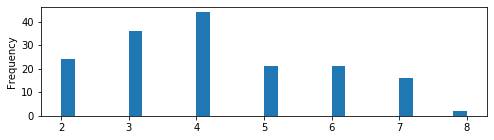

In [105]:
df['length'].plot(kind='hist', bins=30, figsize=(8,2))

In [71]:
from lexicalrichness import LexicalRichness
lex = LexicalRichness(folding_cher_text)

# word count
print(lex.words)

# unique word count
print(lex.terms)

# measure of Textual Lexical Diversity (MTLD)
print(lex.mtld(threshold=0.72))


173
88
50.45833333333333


#### Robyn Lyrics Stats

In [178]:
df_robyn.describe(include='all') 

,lyrics_words,lyrics_words_new
count,221,221
unique,94,86
top,you,you
freq,24,25


In [179]:
df['length'] = df_robyn['lyrics_words'].str.len()

df_robyn[['lyrics_words']].describe(include='O').T

,count,unique,top,freq
lyrics_words,221,94,you,24


#### Cher Twitter Stats

In [181]:
twitter_data_robynkonichiwa.describe(include='all')

,description\t\t\t\t\t\t
count,9
unique,9
top,DJ Cristal Chiou\t\t\t\t\t\t
freq,1


#### Robyn Twitter Stats

In [182]:
twitter_data_cher.describe(include='all')

,description\t\t\t\t\t
count,13
unique,13
top,zoowee mama\t\t\t\t\t
freq,1


Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: It would change the unique count of it.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: 



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [144]:
def is_emoji(s):
    return(s in emoji.UNICODE_EMOJI['en'])

assert(is_emoji("❤️"))
assert(not is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [190]:
import emojis

new_list_robyn = emojis.get ('''I love chill •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…'], ['(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)\t\t\t\t\t\t'], ['Recording Artist / songwriter 🌈 Fashion Stylist of The Floral House Boutique / CEO Of Arcade Mode Records / Actor\t\t\t\t\t\t'], ['🇲🇽|🏳️\u200d🌈\t\t\t\t\t\t'], ['🚀🐕Check 👀t SnoopDogeMeme 🐕🚀 🔥🔥🐢 T M N T 🐢🔥🔥 Music enthusiast! Musician. Writer. Artist. Humanitarian. Animal lover. NFT Lover.\t\t\t\t\t\t'], ['References Available Upon Request\t\t\t\t\t\t'], ['DJ Cristal Chiou\t\t\t\t\t\t'], ['Half mad Jade and shabby cabbie. Old and tired but at least I am immune to teargas. All Trek is good Trek. Doom Patrol is life.\t\t\t\t\t\t'], ['Bro.''')
print(new_list_robyn)

{'🇲🇽', '🐢', '🚀', '👀', '🤡', '🏳️\u200d🌈', '🔥', '🌈', '🌱', '🐕', '🌸'}


In [187]:
new_list_cher = emojis.get ('''𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜\t\t\t\t\t'], ['163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡\t\t\t\t\t'], ['csu\t\t\t\t\t'], ['Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com\t\t\t\t\t'], ['I’m unemployed and live with my parents. MOOPS!\t\t\t\t\t'], ['zoowee mama\t\t\t\t\t'], ['Let the healing begin. Let us learn from the past. 🇨🇦 follower of #TheResistance\t\t\t\t\t'], ['do what thou wilt. 🖤✨\t\t\t\t\t'], ['Curious Canadian Contemplator. She/Her. Sexagenarian. We are here for each other!\t\t\t\t\t'], ['(She/Her/Hers) Feminist. LGBTQ+. BLM. Mental health advocate. Do something nice for somebody today :)\t\t\t\t\t'], ['IG: @browsbyluz_\t\t\t\t\t'], ["BLM I LOVE 80'S VIVA MÉXICO\t\t\t\t\t"], ['Ubuntu to Mudita 🧩 INFP🌻\t\t\t\t\t''')
print(new_list_cher)

{'✨', '🌻', '🧩', '🧡', '🍒', '🇨🇦', '🖤', '💓', '💜'}


In [120]:
def split_count(text):
    emoji_counter = 0
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_counter += 1
            # Remove from the given text the emojis
            text = text.replace(word, '') 

    words_counter = len(text.split())

    return emoji_counter, words_counter

In [121]:
line = "I love chill •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…'], ['(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)\t\t\t\t\t\t'], ['Recording Artist / songwriter 🌈 Fashion Stylist of The Floral House Boutique / CEO Of Arcade Mode Records / Actor\t\t\t\t\t\t'], ['🇲🇽|🏳️\u200d🌈\t\t\t\t\t\t'], ['🚀🐕Check 👀t SnoopDogeMeme 🐕🚀 🔥🔥🐢 T M N T 🐢🔥🔥 Music enthusiast! Musician. Writer. Artist. Humanitarian. Animal lover. NFT Lover.\t\t\t\t\t\t'], ['References Available Upon Request\t\t\t\t\t\t'], ['DJ Cristal Chiou\t\t\t\t\t\t'], ['Half mad Jade and shabby cabbie. Old and tired but at least I am immune to teargas. All Trek is good Trek. Doom Patrol is life.\t\t\t\t\t\t'], ['Bro."
counter = split_count(line)
print("Number of emojis - {}, number of words - {}".format(counter[0], counter[1]))

Number of emojis - 0, number of words - 122


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [201]:
# Your code here

RE_TOKEN = re.compile(r"""
               ( [#]?[@\w'’\.\-\:]*\w     # words, hash tags and email adresses
               )
               """, re.VERBOSE)

def tokenize(text):
    return RE_TOKEN.findall(text)

#tokens = tokenize(text)
#print(*tokens, sep='|')

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [137]:
robyn_song_titles = pd.read_csv(r"C:/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week two/M1 Assignment Data/M1 Results/lyrics/robyn/titles_robyn_songs.txt")

# mosot common words for "robyn":

df["robyn_song_title"] = robyn_song_titles['song_title'].str.lower().str.replace('[^\w\s]','')
 
new_most_common_robyn = df.robyn_song_title.str.split(expand=True).stack().value_counts().reset_index()
 
new_most_common_robyn.columns = ['Word', 'Frequency'] 
 
new_most_common_robyn.head()

,Word,Frequency
0,the,4
1,to,3
2,you,3
3,know,2
4,love,2


In [139]:
cher_song_titles = pd.read_csv(r"C:/UserData/z003cu8m/OneDrive - Siemens AG/Documents/Documents/Documents/Siemens/Computer Backup/Personal/MSADS/Text Mining/Week two/M1 Assignment Data/M1 Results/lyrics/cher/song_titles_cher.txt")

# mosot common words for "cher":

df["cher_song_title"] = cher_song_titles['song_title'].str.lower().str.replace('[^\w\s]','')
 
new_most_common_cher = df.cher_song_title.str.split(expand=True).stack().value_counts().reset_index()
 
new_most_common_cher.columns = ['Word', 'Frequency'] 
 
new_most_common_cher.head()

,Word,Frequency
0,the,3
1,all,3
2,to,3
3,and,2
4,again,2


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.125;0.775x0.755)
Artist 2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

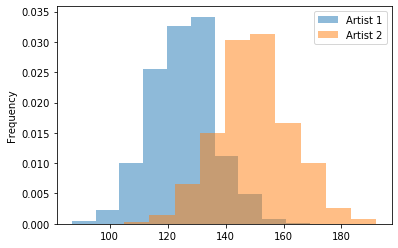

In [127]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: 


In [128]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher              AxesSubplot(0.125,0.125;0.775x0.755)
robynkonichiwa    AxesSubplot(0.125,0.125;0.775x0.755)
Name: length, dtype: object

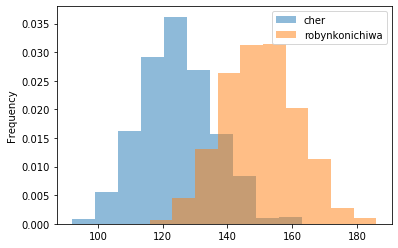

In [129]:
# Your lyric length comparison chart here. 

num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['cher'] * num_replicates + ['robynkonichiwa']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)